# <span style="color:orange">31/05 - Pair Regresión 5 Alicia y Lidia</span>

In [2]:
# Importando paquetes

# Importando módulos y cargando el dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings( "ignore", module = "seaborn\..*" )
import sidetable
#import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_absolute_error, accuracy_score

plt.rcParams["figure.facecolor"] = "w"

import warnings
warnings.filterwarnings('ignore')


# Objetivos

### 1. **Buscar un conjunto de datos a analizar: (Obviar si se reutiliza el conjunto de las clases anteriores)**



In [3]:
df = pd.read_csv('anime_codi.csv', index_col=0)
df

,title,episodes,members,popularity,ranked,score
0,4175,25.0,2389,141,25.0,8.82
1,11065,22.0,2389,28,24.0,8.83
2,7324,13.0,2389,98,23.0,8.83
3,3331,2.0,2389,4,1.0,6.41
4,6414,1.0,2389,502,22.0,8.83
...,...,...,...,...,...,...
19306,3232,13.0,2389,843,1070.0,7.73
19307,3363,2.0,2389,1292,1071.0,7.73
19308,3486,19.0,2389,1314,1073.0,7.73
19309,5264,1.0,2389,1469,1077.0,7.73


**Antes de la regresión logistica hemos decidido utlizar la variable "score", pero antes debemos dividirla en dos rangos , en este caso "puntuacion_baja" y "puntuación_baja", por que se desea predecir al pertenencia a cada clase de nuestros grupos.**

**Tras esto, hemos codificado en valores {"puntuacion_baja":0, "puntuacion_alta":1} con .map(), ya que encontramos errores al intentar analizar ROC curve**

In [4]:
df["score_class"] = pd.cut(df["score"], 2,labels = ["puntuacion_baja", "puntuacion_alta"], ordered=True)

In [5]:
df.sample(10)

,title,episodes,members,popularity,ranked,score,score_class
1275,13886,3.0,1005,9494,8092.0,6.08,puntuacion_baja
1263,2918,1.0,806,9952,8105.0,6.07,puntuacion_baja
18373,12602,26.0,576,10674,8090.0,6.08,puntuacion_baja
9978,8609,1.0,2389,817,1703.0,7.51,puntuacion_alta
7742,13121,1.0,2501,7418,4486.0,6.83,puntuacion_alta
13629,522,2.0,536,10828,6803.0,6.35,puntuacion_baja
8384,2299,13.0,2389,2223,1781.0,7.48,puntuacion_alta
16010,9118,1.0,277,12383,6715.0,6.37,puntuacion_baja
14566,7456,1.0,813,9941,6345.0,6.44,puntuacion_alta
9848,4087,1.0,1320,8921,12160.0,6.39,puntuacion_baja


In [6]:
# Codificamos para continuar  con el ajuste logistico

mapa= {"puntuacion_baja":0, "puntuacion_alta":1}
df["score_class"]= df["score_class"].map(mapa)

In [7]:
df.head()

,title,episodes,members,popularity,ranked,score,score_class
0,4175,25.0,2389,141,25.0,8.82,1
1,11065,22.0,2389,28,24.0,8.83,1
2,7324,13.0,2389,98,23.0,8.83,1
3,3331,2.0,2389,4,1.0,6.41,1
4,6414,1.0,2389,502,22.0,8.83,1


### 3. **Realiza el ajuste logístico utilizando diversas métricas y realiza una gráfica mostrando los resultados.**

In [8]:
x = df.drop(['score_class'], axis = 1)
y = df['score_class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(12700, 6) (12700,)
(3175, 6) (3175,)


In [9]:
# definimos la regresión logistica

log_reg = LogisticRegression(n_jobs=-1, max_iter = 1000)
# ajustamos el modelo
log_reg.fit(x_train,y_train)
# obtenemos las predicciones para el conjunto de entrenamiento
y_pred_train = log_reg.predict(x_train)
# obtenemos las predicciones para el conjunto de test
y_pred_test = log_reg.predict(x_test)

train_score_lr = accuracy_score(y_train, y_pred_train)
print('Para el conjunto train:---------------')
print('El valor de accuracy  es ',train_score_lr)

print('Para el conjunto test:---------------')
test_score_lr = accuracy_score(y_test, y_pred_test)
print('El valor de accuracy  es ',test_score_lr)

Para el conjunto train:---------------
El valor de accuracy  es  0.9040944881889764
Para el conjunto test:---------------
El valor de accuracy  es  0.9080314960629922


**El valor de accuracy estan cerca de 1, no está nada mal. 😄 Vamos a ver ahora la matriz de confusión , la curva de ROC y el valor de AUC**

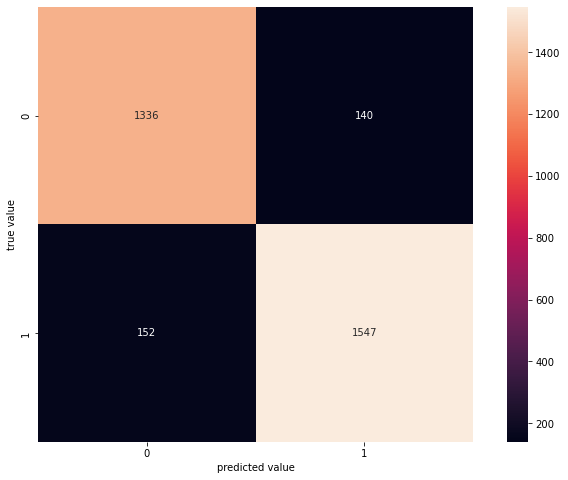

In [10]:
#Matriz de confusión

mat_lr = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr, square=True, annot=True, fmt="d")

plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()


<AxesSubplot:>

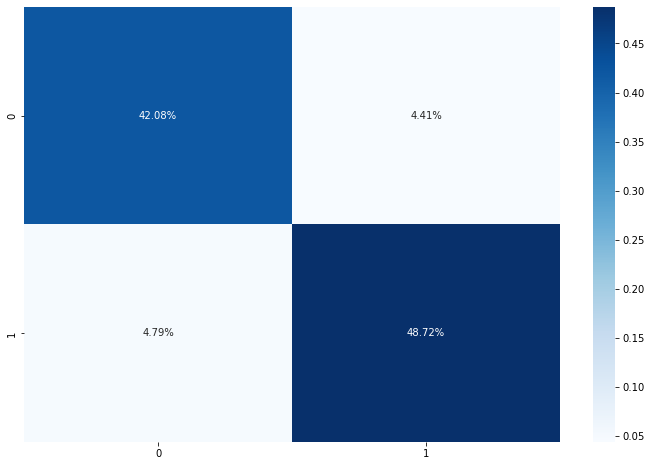

In [11]:
plt.figure(figsize = (12, 8))
sns.heatmap(mat_lr/np.sum(mat_lr), annot=True, 
            fmt='.2%', cmap='Blues')


👉🏻 **1547 verdadero positivo 48,72%**

👉🏻 **1336 verdadero negativo 42,08%**

👉🏻 **152 falso positivo 4,79%**

👉🏻 **140 falso negativo 4,41%**

**Vemos que tenemos un porcentaje bajo de verdaderos, pero al menos tenemos muy pocos valores falsos que es lo que queremos evitar.**

In [12]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      1476
           1       0.92      0.91      0.91      1699

    accuracy                           0.91      3175
   macro avg       0.91      0.91      0.91      3175
weighted avg       0.91      0.91      0.91      3175



The score AUC is: 0.9078423303361933


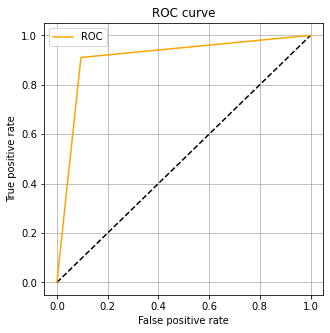

In [13]:
#Curva de ROC y Valor AUC

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_test)
auc_LR=roc_auc_score(y_test, y_pred_test)
print('The score AUC is:',auc_LR)

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')

plt.plot(fpr_log, tpr_log, color='orange', label='ROC')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.grid()
plt.show()

💙 **Tanto la curva ROC como el AUC, nos devuelve que tenemos AUC is: 0.9078423303361933, muy cerca de 1, asi que tenemos un diagnostico cerca de la perfeccion.**   

**Significa que hay 90% de probabilidad de que el modelo pueda distinguir entre "puntuacion_alta" y "puntuacion_baja"**

In [14]:
df.to_csv('anime_codi_estand.csv')